Before we get started, please load relevant libraries (this might take a few minutes):

In [ ]:
install.packages(c("ggplot2"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in download.file(url, destfile, method, mode = "wb", ...):
“URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.5.2.tar.gz': status was 'Failure when receiving data from the peer'”


Error in download.file(url, destfile, method, mode = "wb", ...) : 
  download from 'https://cran.rstudio.com/src/contrib/ggplot2_3.5.2.tar.gz' failed


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘ggplot2’ failed”


# 1. Simple Exercise on Overfitting


First, we consider the example from the lecture and set $p=n$, again:

In [ ]:
set.seed(123)
n <- 100
p <- n
ratio <- p/n
cat("The ratio (p/n) is", ratio, "\n")
X <- matrix(rnorm(n*p), n, p)
Y <- rnorm(n)
model <- lm(Y~X)
cat("R2 is",summary(model)$r.squared, "\n")


The ratio (p/n) is 1 
R2 is 1 


**Exercise 1:** Calculate the in-sample MSE of the linear model. *Hint: predict()*

In [ ]:
pred_ins <- predict(model)
MSE <- mean((Y - pred_ins)^2)
MSE

[1] 3.059827e-28

**Exercise 2:** Simulate 100 new test observation $Y_{test}$ and $X_{test}$ ($n_{test}=100$) from the same data generating process (DGP). Apply the linear model above to predict $Y_{test}$ based on $X_{test}$ and calculate the MSE on the test sample to approximate/estimate the $MSE_{test}$. Interpret your findings!

In [ ]:
n_test <- 100
X_test <- matrix(rnorm(n_test*p), n_test, p)
Y_test <- rnorm(n_test)
pred_oos <- predict(model, X = X_test)
MSE_oos <- mean((Y_test - pred_oos)^2)
MSE_oos


[1] 1.721553

**Exercise 3:** Next, set p=5 and repeat the procedure above. Calculate the in-sample and out-of-sample MSE. What has changed?

In [ ]:
set.seed(777)
n <- 100
p <- 5
ratio <- p/n
cat("The ratio (p/n) is", ratio, "\n")
X <- matrix(rnorm(n*p), n, p)
Y <- rnorm(n)
model <- lm(Y~X)
pred_ins <- predict(model)
MSE <- mean((Y - pred_ins)^2)
MSE

n_test <- n
X_test <- matrix(rnorm(n_test*p), n_test, p)
Y_test <- rnorm(n_test)
pred_oos <- predict(model, X = X_test)
MSE_oos <- mean((Y_test - pred_oos)^2)
MSE_oos



The ratio (p/n) is 0.05 


[1] 0.8778639

[1] 0.8301955

**Exercise 4:** What happens when you increase both $n$ and $n_{test}$?

# 2. Advanced simulation study:

Next, we consider a more complex data generating process:

In [ ]:
set.seed(123)
n <- 80
noise <- 50

z <- rnorm(n, mean = 3, sd = 3)
x <- 0.8* rnorm(n, mean = 0, sd = 8) + 0.2*z + rnorm(n) # covariate
y <- 50 + 100 * (x-10)^3 +  10.4* (x-2)^4 - 3*x^5 +  noise *20* rnorm(n, sd = 100) # outcome

*Exercise 1:* Plot the data $(x,y)$ and try to understand the DGP above.

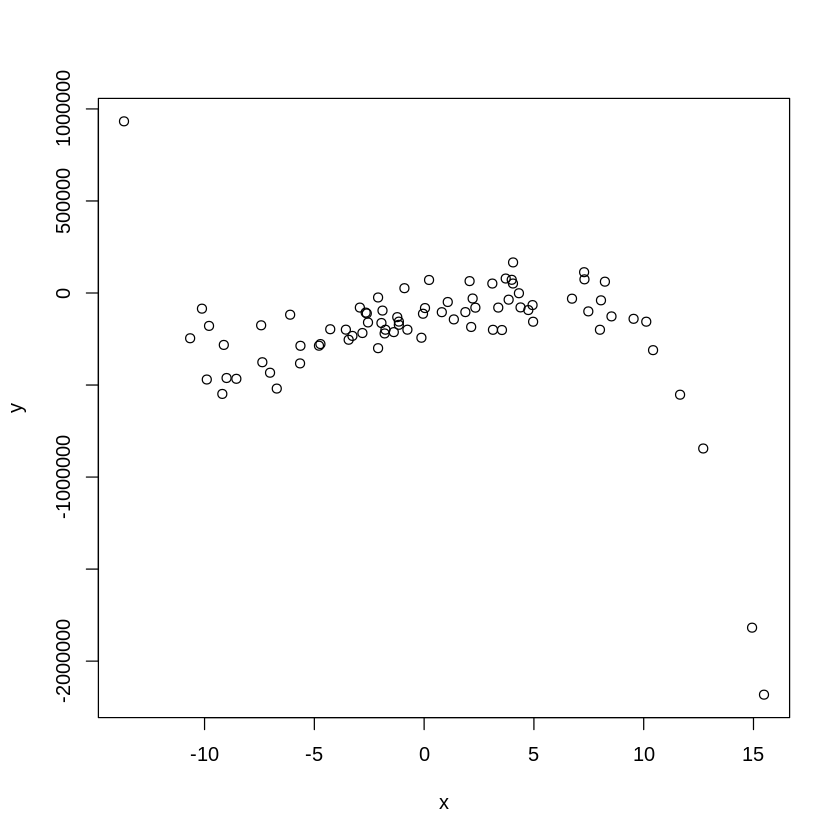

In [ ]:
plot(x,y)

**Exercise 2:**  Fit a simple linear regression to the data above (explain $y$ by $x$). Add the regression line in your plot and calculate the (log) MSE in-sample (*Hint*: abline). Do we have overfitting?

In [ ]:
model <- lm(y~x)
pred_ins <- predict(model)
MSE <- mean((y - pred_ins)^2)
log(MSE)


[1] 25.5092

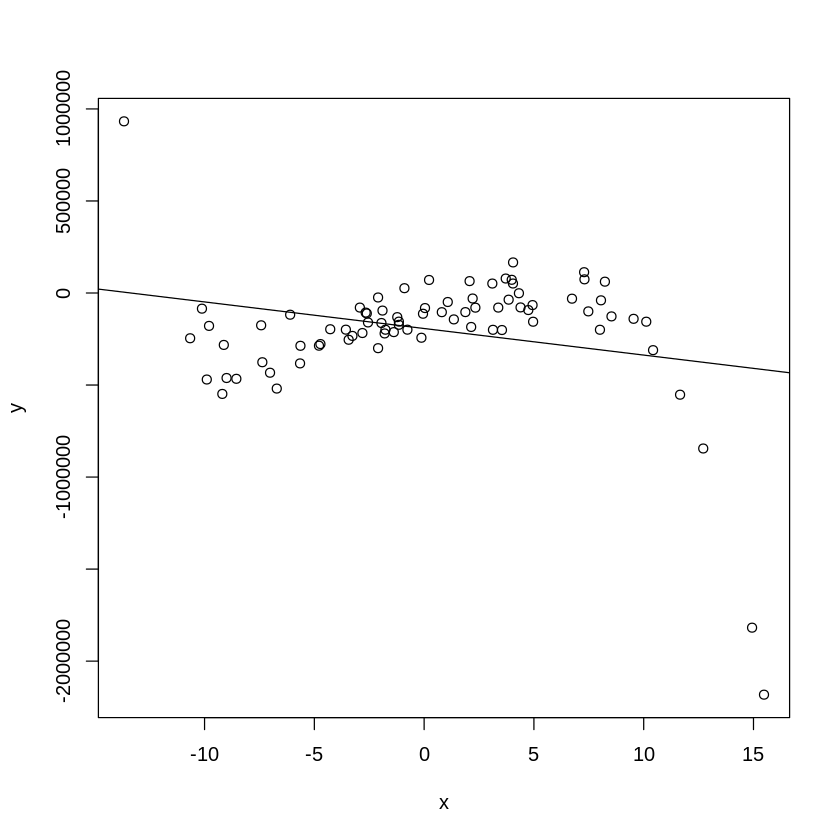

In [ ]:
plot(x,y)
abline(model)

Next, we introduce **sample splitting** to analyze the out-of-sample performance:

In [ ]:
# splitting the data

split <- 0.5
data = data.frame(y,x)

n = dim(data)[1]
set.seed(1234) # to make the results replicable (we will generate random numbers)
random <- sample(1:n, floor(n*split))
# draw (4/5)*n random numbers from 1 to n without replacing them
data_train <- data[random,] # training data
data_test <- data[-random,] # testing data

n_train = nrow(data_train)
n_test = nrow(data_test)

*Exercise 3:* Try to understand the code above. Have a look at the data $data_{train}$ and $data_{test}$ and check if you have understand how sample splitting works.

In [ ]:
n_train
n_test
head(data_train)

[1] 40

[1] 40

,y,x
,<dbl>,<dbl>
28,-469994.6,-9.898067
22,-79274.6,3.376456
9,-212475.6,-1.381212
5,-155459.1,-1.150399
38,-286298.9,-4.788937
16,-233136.1,-3.265510


In [ ]:
head(data_test)

,y,x
,<dbl>,<dbl>
1,-143471.03,1.353317
7,-127126.87,8.532889
10,-39834.21,8.053936
11,-99883.15,7.477493
12,-78341.58,4.390922
13,-79595.80,2.334279


The following code fits the regression model:

$$y=a+\beta_{1}x^1+\dots \beta_{d}x^{d}+ɛ,$$

where $d$ denotes the maximum degree of polynomial of $X$ considered

In [ ]:
degree_of_poly <- 1 # maximum degree d of polynomial of X

fm <- "y ~ poly(x,degree_of_poly,raw=T)"
model <- lm(fm, data_train)



**Exercise 4:** Calculate the in-sample and out-of-sample MSE for the regression model with $d=1$.

In [ ]:
# Predictions
pred_ins <- predict(model)
pred_oos <- predict(model, newdata = data_test)

# For in-sample and out-of-sample MSE plot

MSE_INS = log(mean((data_train$y - pred_ins)^2))
MSE_OOS = log(mean((data_test$y - pred_oos)^2))
cat("(log) MSE in-sample is",MSE_INS, "\n")
cat(" (log) MSE out-of-sample is",MSE_OOS, "\n")

(log) MSE in-sample is 25.54211 
 (log) MSE out-of-sample is 25.47019 


The following code provides plots of in-sample and out-of-sample predictions:

In [ ]:
# For Plots of in-sample and out-of-sample predictions
new_df_train <- data.frame(x = data_train$x, y = data_train$y, pred_ins = pred_ins, as.factor(degree_of_poly))
new_df_test <- data.frame(x = data_test$x, y = data_test$y, pred_oos = pred_oos, as.factor(degree_of_poly))
miny_train <- quantile(data_train$y, probs = 0.)
maxy_train <- quantile(data_train$y, probs = 1)
miny_test <- quantile(data_test$y, probs = 0)
maxy_test <- quantile(data_test$y, probs = 1)


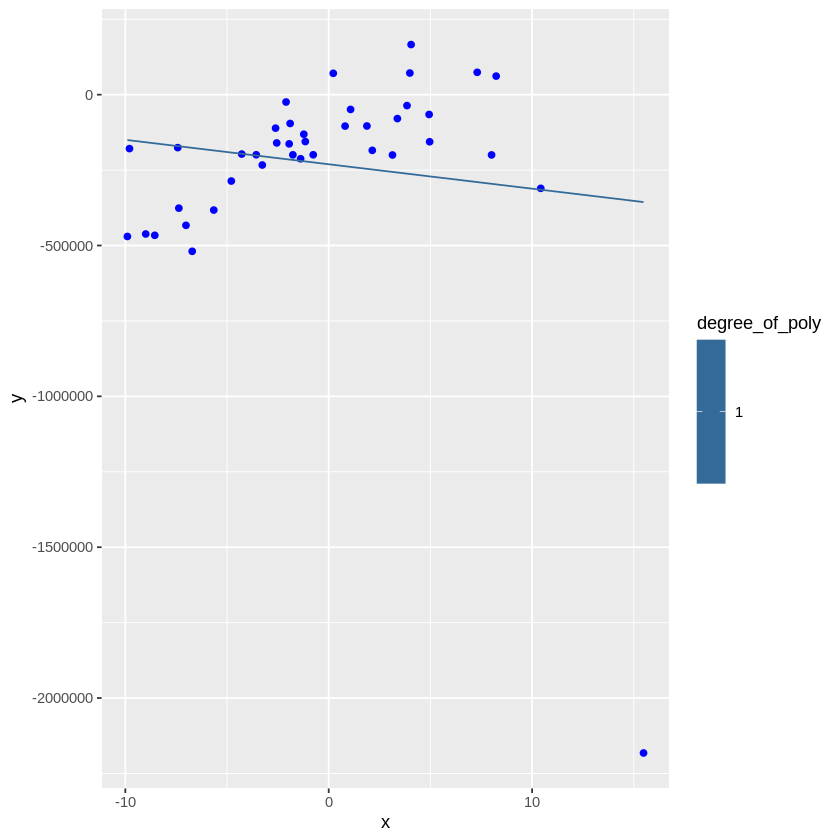

In [ ]:
library(ggplot2)
ggplot(new_df_train, aes(x,y)) +
      geom_point(color = "blue") +
      scale_y_continuous(limits =  c(miny_train, maxy_train)) +
      geom_line(data = new_df_train, aes(x = x, y = pred_ins, color = degree_of_poly))



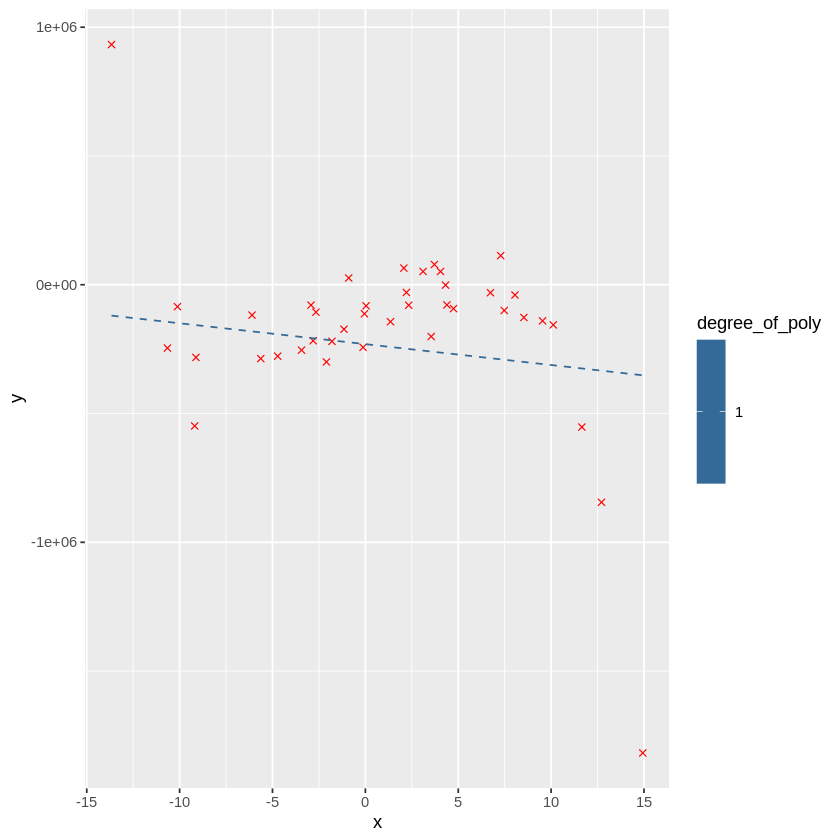

In [ ]:
ggplot(new_df_test, aes(x,y)) +
        geom_point(data = new_df_test, color = "red", shape = 4) +
        scale_y_continuous(limits =  c(miny_test, maxy_test)) +
        geom_line(data = new_df_test, aes(x= x, y = pred_oos , color = degree_of_poly), linetype = 2)

**Exercise 4:** To achieve a better fit to the data, construct additional regressors. To do this, increase the parameter *degree_of_poly* and repeat the analysis above. Interpret your results.

In [ ]:
degree_of_poly <- 5 # maximum degree of polynomial of X

fm <- "y ~ poly(x,degree_of_poly,raw=T)"
model <- lm(fm, data_train)

# Predictions
pred_ins <- predict(model)
pred_oos <- predict(model, newdata = data_test)

# For in-sample and out-of-sample MSE plot

MSE_INS = log(mean((data_train$y - pred_ins)^2))
MSE_OOS = log(mean((data_test$y - pred_oos)^2))
cat("(log) MSE in-sample is",MSE_INS, "\n")
cat(" (log) MSE out-of-sample is",MSE_OOS, "\n")

(log) MSE in-sample is 22.95664 
 (log) MSE out-of-sample is 23.14392 


In [ ]:
# For Plots of in-sample and out-of-sample predictions
new_df_train <- data.frame(x = data_train$x, y = data_train$y, pred_ins = pred_ins, as.factor(degree_of_poly))
new_df_test <- data.frame(x = data_test$x, y = data_test$y, pred_oos = pred_oos, as.factor(degree_of_poly))
miny_train <- quantile(data_train$y, probs = 0.00)
maxy_train <- quantile(data_train$y, probs = 1)
miny_test <- quantile(data_test$y, probs = 0.00)
maxy_test <- quantile(data_test$y, probs = 1)


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


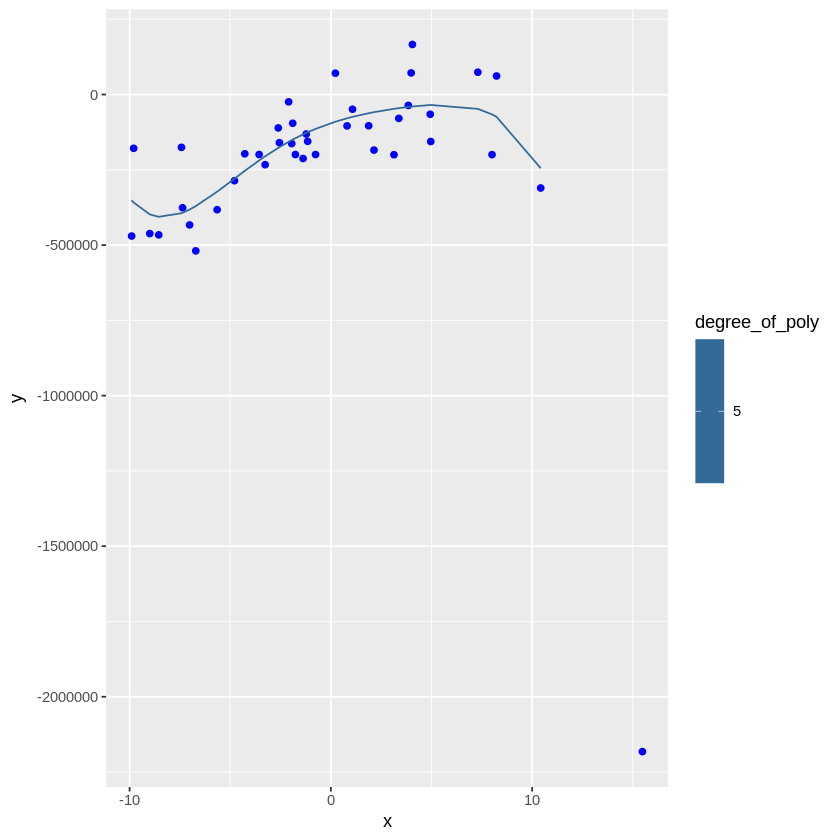

In [ ]:
library(ggplot2)
ggplot(new_df_train, aes(x,y)) +
      geom_point(color = "blue") +
      scale_y_continuous(limits =  c(miny_train, maxy_train)) +
      geom_line(data = new_df_train, aes(x = x, y = pred_ins, color = degree_of_poly))


Warning message:
“Removed 9 rows containing missing values or values outside the scale range
(`geom_line()`).”


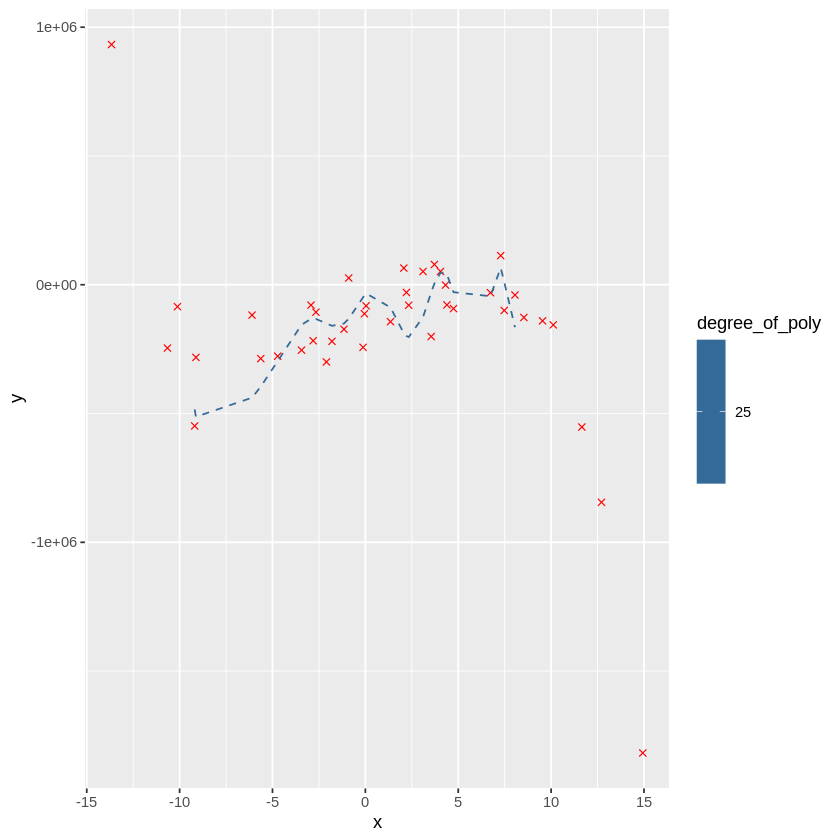

In [ ]:
ggplot(new_df_test, aes(x,y)) +
        geom_point(data = new_df_test, color = "red", shape = 4) +
        scale_y_continuous(limits =  c(miny_test, maxy_test)) +
        geom_line(data = new_df_test, aes(x= x, y = pred_oos , color = degree_of_poly), linetype = 2)